# Exercise 1

In [1]:
from Automata import Automata

from utils import visualize

%load_ext autoreload
%autoreload 2

## Task 1 - Setting up the modeling environment (DONE)

Scenario to show that our implementation allows for different pedestrians and obstacles editing an easy JSON file (using as input for the automata the file path) or writing in a notebook a dictionary as follow: 

In [71]:
configTask1 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 11,
        "height": 11
    },
    "pedestrians": [
        [1, 0, 5]
    ],
    "targets": [
        [[1], 7, 5]
    ],
    "obstacles": [
        [3, 4],[3, 5],[3, 6]
    ]
}

In [72]:
task1Automata = Automata(configTask1)

Let's take a look at the initial state:

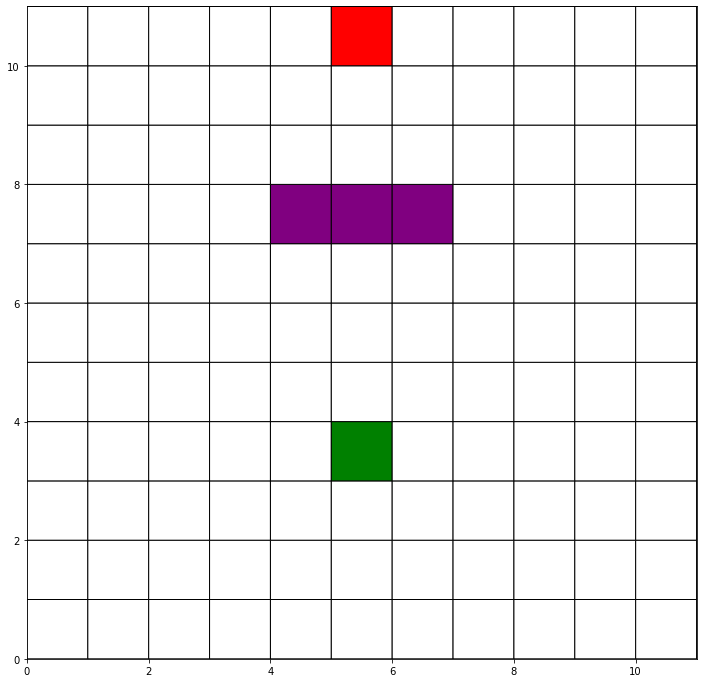

In [73]:
visualize(task1Automata.getState())

Let's simulate for 10 time steps and let's take a look at the final state with the followed path:

In [74]:
task1Automata.simulate(task1Automata.basicOperator, 10)

Simulation finished after 8 steps. All pedestrians achieved their targets.


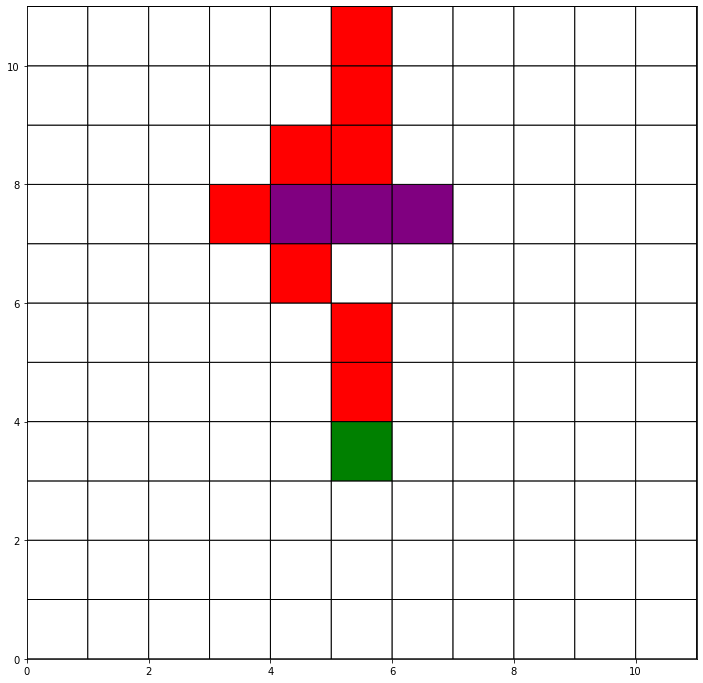

In [75]:
visualize(task1Automata.getStateWithPaths())

## Task 2 - First step of a single pedestrian (DONE)

Scenario:
- 50 by 50 cells (2500 in total)
- Single pedestrian at position (5, 25)
- Target at (25, 25)

In [7]:
configTask2 = {
    "name": "Task2Scenario",
    "dimensions": {
        "width": 50,
        "height": 50
    },
    "pedestrians": [
        [1, 5, 25]
    ],
    "targets": [
        [[1], 25, 25]
    ],
    "obstacles": []
}

In [26]:
task2Automata = Automata(configTask2)

Let's take a look at the initial state:

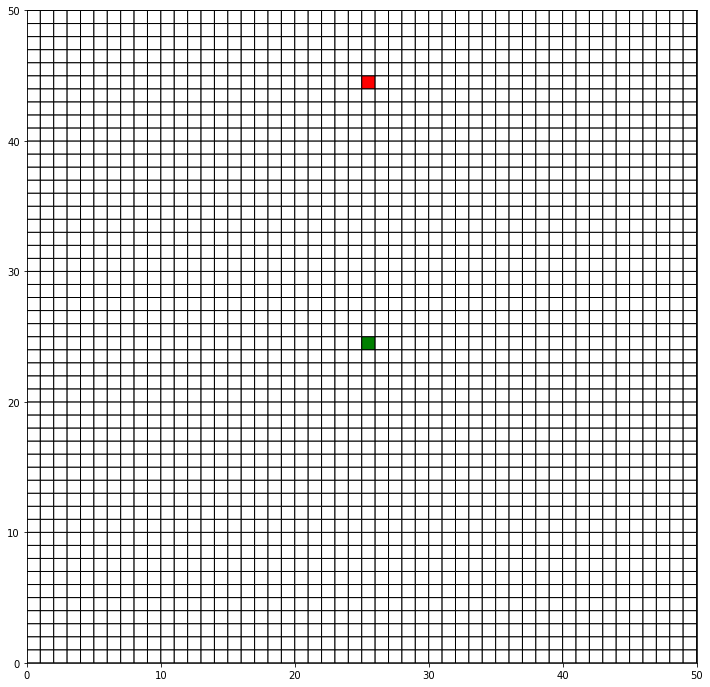

In [27]:
visualize(task2Automata.getState())

Let's simulate for 25 time steps and let's take a look at the final state with the followed path:

In [28]:
task2Automata.simulate(task2Automata.basicOperator, 25)

Simulation finished after 20 steps. All pedestrians achieved their targets.


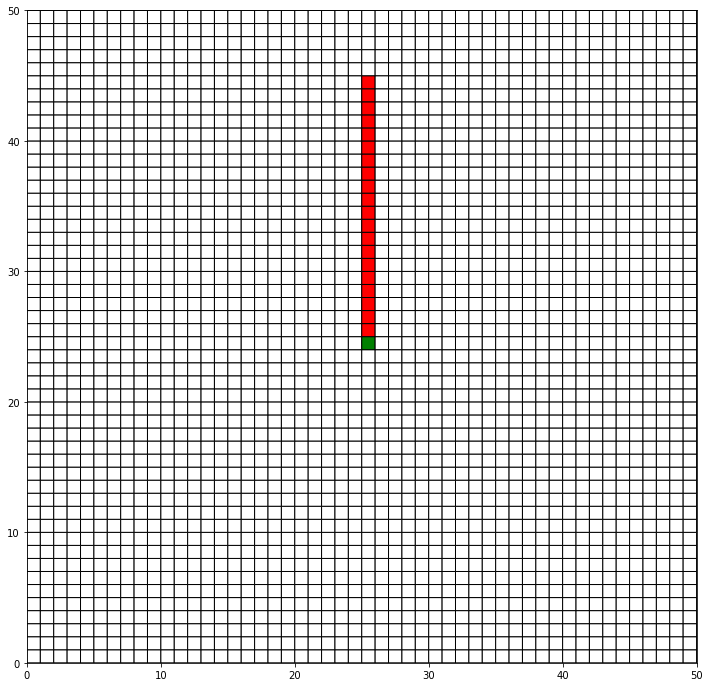

In [29]:
visualize(task2Automata.getStateWithPaths())

## Task 3 - Interaction of pedestrians

Scenario:
- 50 by 50 cells (2500 in total)
- ???????
- ???????

In [ ]:
configTask3 = {
    "name": "Task3Scenario",
    "dimensions": {
        "width": 50,
        "height": 50
    },
    "pedestrians": [
        [1, 5, 25], [2, 25, 45], [3, 45, 25], [4, 25, 5], [5, 20, 44]
    ],
    "targets": [
        [[1,2,3,4,5], 25, 25]
    ],
    "obstacles": []
}

In [ ]:
task3Automata = Automata(configTask3)

Let's take a look at the initial state:

In [ ]:
visualize(task3Automata.getState())

Let's simulate for 25 time steps and let's take a look at the final state with the followed paths:

In [ ]:
task2Automata.simulate(task3Automata.basicOperator, 25)

In [ ]:
visualize(task3Automata.getStateWithPaths())

## Task 4 - Obstacle avoidance

Scenario from Figure 10 of "RiMEA. Guideline for Microscopic Evacuation Analysis. RiMEA e.V., 3.0.0 edition, 2016. www.rimea.de.":
- 50 by 50 cells (2500 in total)
- Single pedestrian at position (5, 25)
- Target at (25, 25)

Scenario from chicken test (Figure 5 from the Exercise Sheet):
- 10 by 1 cells (2500 in total)
- Single pedestrian at position (5, 25)
- Target at (25, 25)

In [49]:
configTask41 = {
    "name": "Chicken Test",
    "dimensions": {
        "width": 7,
        "height": 7
    },
    "pedestrians": [
        [1, 3, 0]
    ],
    "targets": [
        [[1], 3, 6]
    ],
    "obstacles": [
        [3, 4], [2, 4], [4,4], [1, 4], [5,4], [5,3], [5,2], [1, 3], [1, 2]
    ]
}
task41Automata = Automata(configTask41)

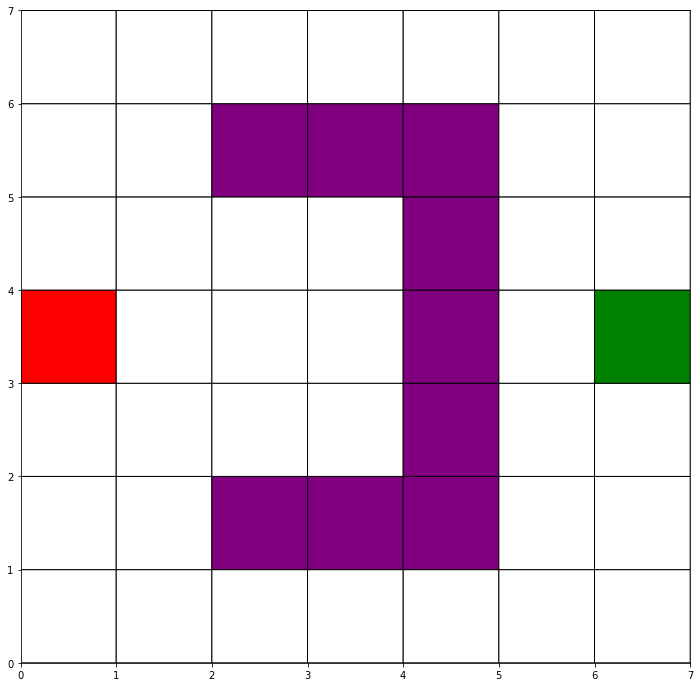

In [50]:
visualize(task41Automata.getState())

Simulation without obstacle avoidance:

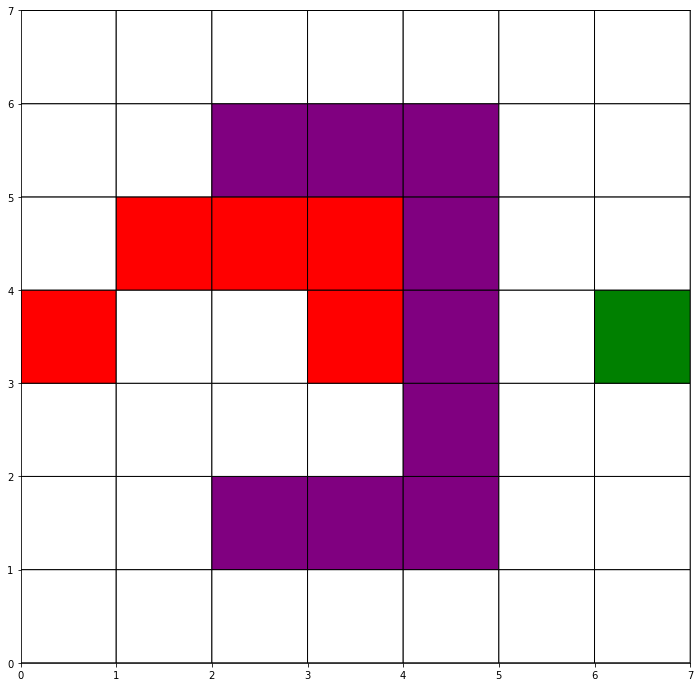

In [52]:
task41Automata.simulate(task41Automata.operatorWithCostFunction, 10, avoidObstacles = False)
visualize(task41Automata.getStateWithPaths())

Simulation with obstacle avoidance:

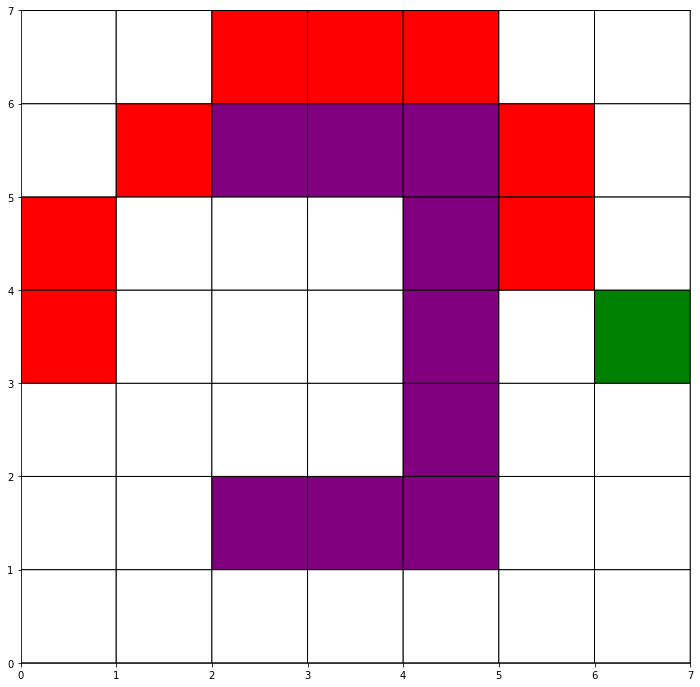

In [54]:
task41Automata = Automata(configTask41)
task41Automata.simulate(task41Automata.operatorWithCostFunction, 10, avoidObstacles = True)
visualize(task41Automata.getStateWithPaths())

## Task 5 - Tests